In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.covariance import EmpiricalCovariance


rnd = 42

In [28]:
sgcredit_df = pd.read_table("../data/SouthGermanCredit/SouthGermanCredit.asc", header=0, sep=None)

/home/nic/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [29]:
#Change column names from German to English

sgcredit_df = sgcredit_df.rename(columns=({"laufkont" : "status", "laufzeit" : "duration", "moral" : "credit history", "verw" : "purpose", "hoehe" : "amount", 
                    "sparkont" : "savings", "beszeit" : "employment duration", "rate" : "installment rate",
                    "famges" : "personal status sex", "buerge" : "other debtors",
                    "wohnzeit" : "present residence", "verm" : "property",
                    "alter" : "age", "weitkred" : "other installment plans",
                    "wohn" : "housing", "bishkred" : "number credits",
                    "beruf" : "job", "pers" : "people liable", "telef" : "telephone", "gastarb" : "foreign worker",
                    "kredit" : "credit risk"}))

In [30]:
scaler = StandardScaler()
ohe = OneHotEncoder()


In [31]:
sgcredit_df["age"] = scaler.fit_transform(sgcredit_df["age"].values.reshape(-1,1))
sgcredit_df["amount"] = scaler.fit_transform(sgcredit_df["amount"].values.reshape(-1,1))
sgcredit_df["duration"] = scaler.fit_transform(sgcredit_df["duration"].values.reshape(-1,1))

In [32]:
sgcredit_df.head()

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,property,age,other installment plans,housing,number credits,job,people liable,telephone,foreign worker,credit risk
0,1,-0.240857,4,2,-0.787657,1,2,4,2,1,...,2,-1.281573,3,1,1,3,2,1,2,1
1,1,-0.987573,4,0,-0.167384,1,3,2,3,1,...,1,0.040363,3,1,2,3,1,1,2,1
2,2,-0.738668,2,9,-0.861381,2,4,2,2,1,...,1,-1.105315,3,1,1,2,2,1,2,1
3,1,-0.738668,4,0,-0.407341,1,3,3,3,1,...,1,0.304750,3,1,2,2,1,1,1,1
4,1,-0.738668,4,0,-0.389974,1,3,4,3,1,...,2,0.216621,1,2,2,2,2,1,1,1


In [33]:
# ct= ColumnTransformer([("scaler", StandardScaler(), [1,4,12]),("onehot", OneHotEncoder(), [0,2,3,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20])])

In [34]:
# test_df = ct.fit_transform(sgcredit_df)

In [35]:
#adjust to sample set and merge



In [36]:
test_df = pd.get_dummies(sgcredit_df)
test_df.head()

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,property,age,other installment plans,housing,number credits,job,people liable,telephone,foreign worker,credit risk
0,1,-0.240857,4,2,-0.787657,1,2,4,2,1,...,2,-1.281573,3,1,1,3,2,1,2,1
1,1,-0.987573,4,0,-0.167384,1,3,2,3,1,...,1,0.040363,3,1,2,3,1,1,2,1
2,2,-0.738668,2,9,-0.861381,2,4,2,2,1,...,1,-1.105315,3,1,1,2,2,1,2,1
3,1,-0.738668,4,0,-0.407341,1,3,3,3,1,...,1,0.304750,3,1,2,2,1,1,1,1
4,1,-0.738668,4,0,-0.389974,1,3,4,3,1,...,2,0.216621,1,2,2,2,2,1,1,1


In [37]:
scaler.fit_transform(sgcredit_df[["age", "amount", "duration"]])

array([[-1.28157308, -0.78765692, -0.24085723],
       [ 0.04036312, -0.16738429, -0.9875727 ],
       [-1.10531492, -0.86138075, -0.73866754],
       ...,
       [-0.48841136,  3.3348522 ,  0.00804793],
       [ 1.4504284 ,  1.13306158, -0.73866754],
       [-0.40028228,  1.09123749,  0.75476341]])

In [38]:
sgcredit_df.head(10)

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,property,age,other installment plans,housing,number credits,job,people liable,telephone,foreign worker,credit risk
0,1,-0.240857,4,2,-0.787657,1,2,4,2,1,...,2,-1.281573,3,1,1,3,2,1,2,1
1,1,-0.987573,4,0,-0.167384,1,3,2,3,1,...,1,0.040363,3,1,2,3,1,1,2,1
2,2,-0.738668,2,9,-0.861381,2,4,2,2,1,...,1,-1.105315,3,1,1,2,2,1,2,1
3,1,-0.738668,4,0,-0.407341,1,3,3,3,1,...,1,0.304750,3,1,2,2,1,1,1,1
4,1,-0.738668,4,0,-0.389974,1,3,4,3,1,...,2,0.216621,1,2,2,2,2,1,1,1
5,1,-0.904604,4,0,-0.365163,1,2,1,3,1,...,1,1.097912,3,1,2,2,1,1,1,1
6,1,-1.070541,4,0,0.044926,1,4,1,3,1,...,1,0.304750,3,2,2,2,2,1,1,1
7,1,-1.236478,4,0,-0.677071,1,2,2,3,1,...,1,0.392879,3,2,1,2,1,1,1,1
8,4,-0.240857,4,3,-0.770289,1,1,4,2,1,...,3,2.596106,3,2,2,1,2,1,2,1
9,2,0.256953,2,3,0.172525,3,1,1,2,1,...,4,-1.105315,3,1,1,1,2,1,2,1


In [39]:
sgcredit_df.shape

(1000, 21)

In [40]:
X=sgcredit_df.drop("credit risk", axis=1)
y=sgcredit_df[["credit risk"]]


In [41]:
X.head()

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,present residence,property,age,other installment plans,housing,number credits,job,people liable,telephone,foreign worker
0,1,-0.240857,4,2,-0.787657,1,2,4,2,1,4,2,-1.281573,3,1,1,3,2,1,2
1,1,-0.987573,4,0,-0.167384,1,3,2,3,1,2,1,0.040363,3,1,2,3,1,1,2
2,2,-0.738668,2,9,-0.861381,2,4,2,2,1,4,1,-1.105315,3,1,1,2,2,1,2
3,1,-0.738668,4,0,-0.407341,1,3,3,3,1,2,1,0.304750,3,1,2,2,1,1,1
4,1,-0.738668,4,0,-0.389974,1,3,4,3,1,4,2,0.216621,1,2,2,2,2,1,1


In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rnd)


In [43]:
train_purpose = pd.get_dummies(X_train["purpose"], prefix="purpose")
train_purpose.drop("purpose_0", axis=1, inplace=True)
train_purpose.head()

,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_8,purpose_9,purpose_10
82,0,0,0,0,0,0,0,0,0
991,1,0,0,0,0,0,0,0,0
789,0,1,0,0,0,0,0,0,0
894,0,1,0,0,0,0,0,0,0
398,1,0,0,0,0,0,0,0,0


In [44]:
def get_dummies_pipe(col):
    """ 
    Take column name as string to one hot encode
    """
    df = pd.get_dummies(X_train[col], prefix=col)
    return df 

In [45]:
def get_dummies_pipe_test(col):
    """ 
    Take column name as string to one hot encode
    """
    df = pd.get_dummies(X_test[col], prefix=col)
    return df 

In [46]:
train_status = get_dummies_pipe("status")
train_status.head()

,status_1,status_2,status_3,status_4
82,0,1,0,0
991,0,1,0,0
789,0,1,0,0
894,0,1,0,0
398,0,0,0,1


In [47]:
test_status = get_dummies_pipe_test("status")
test_status.head()

,status_1,status_2,status_3,status_4
521,0,0,0,1
737,0,0,0,1
740,0,0,0,1
660,0,1,0,0
411,0,0,0,1


In [48]:
train_savings = get_dummies_pipe("savings")
train_savings.value_counts()

savings_1  savings_2  savings_3  savings_4  savings_5
1          0          0          0          0            456
0          0          0          0          1            141
           1          0          0          0             76
           0          1          0          0             47
                      0          1          0             30
dtype: int64

In [49]:
test_savings = get_dummies_pipe_test("savings")
test_savings.value_counts()

savings_1  savings_2  savings_3  savings_4  savings_5
1          0          0          0          0            147
0          0          0          0          1             42
           1          0          0          0             27
           0          0          1          0             18
                      1          0          0             16
dtype: int64

In [50]:
    ##Drop column
    
    # df.drop(f"{col}_0", axis=1, inplace=True)

In [51]:

def merge_one_hot_column(to_df, merge_df):
    """ 
    Takes two dataframes and merges
    """
    to_df = to_df.merge(merge_df, left_index=True, right_index=True)

In [52]:
X_train = X_train.merge(train_purpose, left_index=True, right_index=True)
X_train = X_train.merge(train_status, left_index=True, right_index=True)
X_train = X_train.merge(train_savings, left_index=True, right_index=True)

In [53]:
X_train.head()

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,purpose_10,status_1,status_2,status_3,status_4,savings_1,savings_2,savings_3,savings_4,savings_5
82,2,-0.240857,2,0,0.919688,2,3,2,3,1,...,0,0,1,0,0,0,1,0,0,0
991,2,0.256953,2,1,3.299054,1,5,4,2,1,...,0,0,1,0,0,1,0,0,0,0
789,2,0.256953,4,2,0.519169,1,2,2,2,1,...,0,0,1,0,0,1,0,0,0,0
894,2,0.256953,3,2,-0.427899,1,1,3,2,1,...,0,0,1,0,0,1,0,0,0,0
398,4,-0.738668,3,1,-0.626740,1,3,4,4,1,...,0,0,0,0,1,1,0,0,0,0


In [54]:
def scale_transform(df, col):
    """
    Takes Dataframe and column name (str) applies scaler and transforms
    """
    df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

In [55]:
X_train["age"] = scaler.fit_transform(X_train["age"].values.reshape(-1,1))
X_train["amount"] = scaler.fit_transform(X_train["amount"].values.reshape(-1,1))
X_train["duration"] = scaler.fit_transform(X_train["duration"].values.reshape(-1,1))

In [59]:
X_train.head(10)

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,purpose_10,status_1,status_2,status_3,status_4,savings_1,savings_2,savings_3,savings_4,savings_5
82,2,-0.268089,2,0,0.913994,2,3,2,3,1,...,0,0,1,0,0,0,1,0,0,0
991,2,0.227964,2,1,3.313388,1,5,4,2,1,...,0,0,1,0,0,1,0,0,0,0
789,2,0.227964,4,2,0.510104,1,2,2,2,1,...,0,0,1,0,0,1,0,0,0,0
894,2,0.227964,3,2,-0.444936,1,1,3,2,1,...,0,0,1,0,0,1,0,0,0,0
398,4,-0.764141,3,1,-0.645451,1,3,4,4,1,...,0,0,0,0,1,1,0,0,0,0
323,1,-0.929492,4,2,-0.420631,5,2,2,2,2,...,0,1,0,0,0,0,0,0,0,1
519,4,1.220068,4,2,1.364707,1,2,2,2,1,...,0,0,0,0,1,1,0,0,0,0
916,1,-0.764141,2,2,-0.724442,1,3,2,2,1,...,0,1,0,0,0,1,0,0,0,0
922,1,0.227964,2,0,-0.667254,1,4,4,2,1,...,0,1,0,0,0,1,0,0,0,0
5,1,-0.929492,4,0,-0.381671,1,2,1,3,1,...,0,1,0,0,0,1,0,0,0,0


In [60]:
def onehotadjust (df, col):
    """process column with two variables to one hot binary"""

    df[col] = df[col].apply(lambda x : x -1)

In [61]:
def preprocesspipe(df):

    onehotadjust(df, "telephone")
    onehotadjust(df, "foreign worker")
    df["2-3 credits"] = df["number credits"].map(lambda x: 1.0 if x== 2 else 0.0)
    df["4-5 credits"] = df["number credits"].map(lambda x: 1.0 if x== 3 else 0.0)
    df["6+ credits"] = df["number credits"].map(lambda x: 1.0 if x== 4 else 0.0)

In [62]:
preprocesspipe(X_train)

In [63]:
preprocesspipe(X_test)

/tmp/ipykernel_132765/4230169824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x : x -1)
/tmp/ipykernel_132765/2942514109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["2-3 credits"] = df["number credits"].map(lambda x: 1.0 if x== 2 else 0.0)
/tmp/ipykernel_132765/2942514109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [64]:
X_train["telephone"].head()

82     1
991    1
789    0
894    1
398    0
Name: telephone, dtype: int64

In [65]:
test_one = LogisticRegression(random_state=rnd).fit(X[["age","amount","telephone"]],y["credit risk"])

In [66]:
test_one.coef_

array([[ 0.20619562, -0.37152104,  0.33204176]])

In [67]:
tiny_test = X_test.head()

# onehotadjust(tiny_test, "telephone")

In [68]:
test_one.predict_proba(tiny_test[["age","amount", "telephone"]])

array([[0.60899061, 0.39100939],
       [0.29274199, 0.70725801],
       [0.36999721, 0.63000279],
       [0.351837  , 0.648163  ],
       [0.32763685, 0.67236315]])

In [69]:

# """ 
# number_credits:    
#  1 : 1   
#  2 : 2-3 
#  3 : 4-5 
#  4 : >= 6
# # """

# X_train["1 credit"] = X_train["number credits"].map(lambda x: 1.0 if x== 1 else 0.0)
# X_train["2-3 credits"] = X_train["number credits"].map(lambda x: 1.0 if x== 2 else 0.0)
# X_train["4-5 credits"] = X_train["number credits"].map(lambda x: 1.0 if x== 3 else 0.0)
# X_train["6+ credits"] = X_train["number credits"].map(lambda x: 1.0 if x== 4 else 0.0)

In [70]:
X_train["number credits"].value_counts()

1    470
2    254
3     22
4      4
Name: number credits, dtype: int64

In [71]:

# X_train = X_train.drop(labels={"1 credit"}, axis=1)

In [72]:
X_test.head()

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,other installment plans,housing,number credits,job,people liable,telephone,foreign worker,2-3 credits,4-5 credits,6+ credits
521,4,1.252574,2,2,2.730175,1,1,4,2,1,...,3,2,2,4,2,1,1,1.0,0.0,0.0
737,4,-0.240857,4,3,-0.752213,4,3,4,3,1,...,3,2,2,3,2,0,1,1.0,0.0,0.0
740,4,-0.738668,2,2,-0.544156,1,4,3,2,1,...,3,2,1,2,2,0,1,0.0,0.0,0.0
660,2,-1.070541,2,3,-0.658286,1,3,4,3,3,...,3,2,1,3,2,0,0,0.0,0.0,0.0
411,4,0.256953,3,9,-0.103939,5,3,4,3,1,...,3,2,2,3,1,1,1,1.0,0.0,0.0


In [73]:
X_train.head()

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,status_3,status_4,savings_1,savings_2,savings_3,savings_4,savings_5,2-3 credits,4-5 credits,6+ credits
82,2,-0.268089,2,0,0.913994,2,3,2,3,1,...,0,0,0,1,0,0,0,1.0,0.0,0.0
991,2,0.227964,2,1,3.313388,1,5,4,2,1,...,0,0,1,0,0,0,0,0.0,0.0,0.0
789,2,0.227964,4,2,0.510104,1,2,2,2,1,...,0,0,1,0,0,0,0,0.0,0.0,0.0
894,2,0.227964,3,2,-0.444936,1,1,3,2,1,...,0,0,1,0,0,0,0,0.0,0.0,0.0
398,4,-0.764141,3,1,-0.645451,1,3,4,4,1,...,0,1,1,0,0,0,0,0.0,0.0,0.0


In [74]:
# onehotadjust(X_train, "foreign worker")

In [75]:
# # tiny_test = X_test.head()

# onehotadjust(tiny_test, "foreign worker")

In [76]:
test_two = LogisticRegression(random_state=rnd).fit(X_train[["age","amount","telephone", "2-3 credits", "4-5 credits", "6+ credits"]],y_train["credit risk"])

In [111]:
test_two_proba = test_two.predict_proba(X_test[["age","amount","telephone", "2-3 credits", "4-5 credits", "6+ credits"]])
test_two_proba.mean()

0.5

In [112]:
test_two_proba = test_two_proba[:,1]
test_two_proba.mean()

0.6965992581206155

In [92]:
ttwo_pred = test_two.predict(X_test[["age","amount","telephone", "2-3 credits", "4-5 credits", "6+ credits"]])


/home/nic/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Target')]

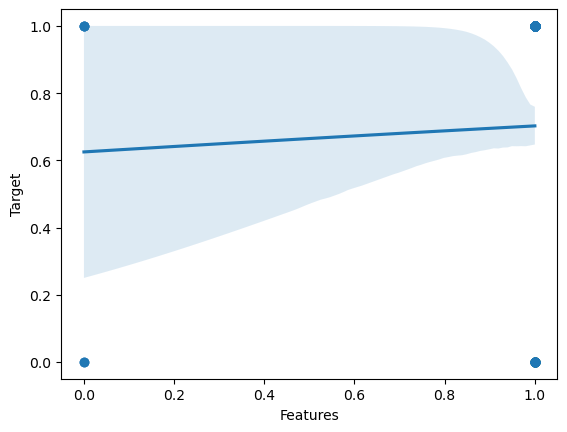

In [93]:
ax = sns.regplot(ttwo_pred, y_test, logistic=True)
ax.set(xlabel='Features', ylabel='Target')

In [94]:
test_two.coef_

array([[ 0.19281298, -0.36273262,  0.42930563,  0.25889471,  0.02802401,
        -0.44472538]])

In [95]:

print(classification_report(y_test, ttwo_pred))

              precision    recall  f1-score   support

           0       0.38      0.04      0.07        75
           1       0.70      0.97      0.82       175

    accuracy                           0.69       250
   macro avg       0.54      0.51      0.44       250
weighted avg       0.60      0.69      0.59       250



In [96]:
test_two.score(X_test[["age","amount","telephone", "2-3 credits", "4-5 credits", "6+ credits"]],y_test)

0.692

In [98]:
# X_test[["telephone", "2-3 credits", "4-5 credits", "6+ credits"]]

In [99]:
y_true = y_test
y_pred = ttwo_pred


cm = confusion_matrix(y_true,y_pred)

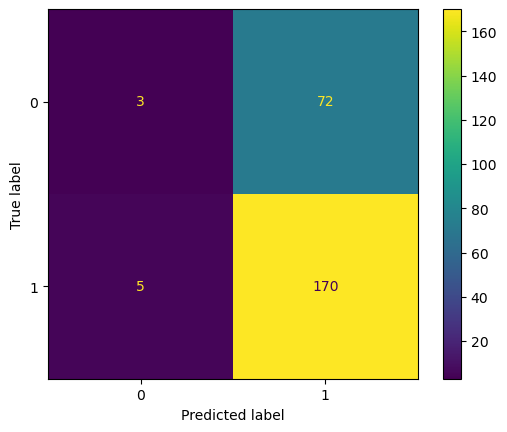

In [100]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()
plt.show()

In [139]:
cm_best_thresh = confusion_matrix(y_true, test_two_proba >= 0.69)
cm_best_thresh

array([[ 41,  34],
       [ 72, 103]])

In [140]:
print(classification_report(y_true, test_two_proba >= 0.69))

              precision    recall  f1-score   support

           0       0.36      0.55      0.44        75
           1       0.75      0.59      0.66       175

    accuracy                           0.58       250
   macro avg       0.56      0.57      0.55       250
weighted avg       0.64      0.58      0.59       250



In [138]:
cm_extreme = confusion_matrix(y_true, test_two_proba >= 0.70)
cm_extreme

array([[47, 28],
       [81, 94]])

In [137]:
print(classification_report(y_true, test_two_proba >= 0.85))

              precision    recall  f1-score   support

           0       0.30      0.99      0.46        75
           1       0.50      0.01      0.01       175

    accuracy                           0.30       250
   macro avg       0.40      0.50      0.23       250
weighted avg       0.44      0.30      0.15       250



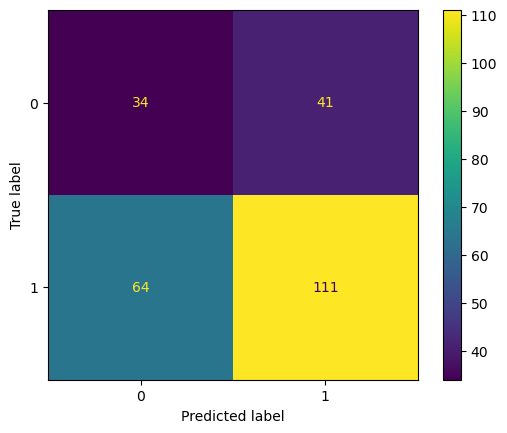

In [135]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_thresh)


disp.plot()
plt.show()

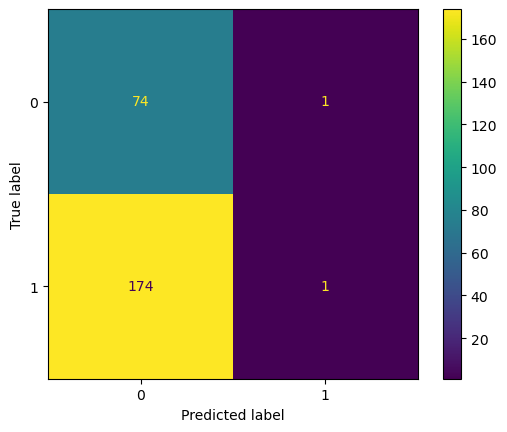

In [131]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_extreme)


disp.plot()
plt.show()

In [ ]:
tiny_test.head()

In [ ]:
test_two.predict_proba(tiny_test[["age","amount", "telephone", "2-3 credits", "4-5 credits", "6+ credits"]])

In [ ]:
model_coeffs = test_two.coef_

In [ ]:
feat = X_train[["age","amount", "telephone", "2-3 credits", "4-5 credits", "6+ credits"]].head()